    Objectius
    Neteja i interpretació de les dades.
    Preprocessats.
    Creació de models de classificació (arbres de classificació, KNN - k-Nearest neighbors, regressió logística, support vector machine, XGboost, altres models...).
    Utilització de les mètriques per interpretar els resultats.
    Estudi i modificació de paràmetres.

## Importació i exploració de dades

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Ocultar Warnings
import warnings

# Ignorar FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [97]:
# Imprimir el fitxer txt    
with open("wineNames.txt") as wineNames:
    print(wineNames.read())

1. Title of Database: Wine recognition data
	Updated Sept 21, 1998 by C.Blake : Added attribute information

2. Sources:
   (a) Forina, M. et al, PARVUS - An Extendible Package for Data
       Exploration, Classification and Correlation. Institute of Pharmaceutical
       and Food Analysis and Technologies, Via Brigata Salerno, 
       16147 Genoa, Italy.

   (b) Stefan Aeberhard, email: stefan@coral.cs.jcu.edu.au
   (c) July 1991
3. Past Usage:

   (1)
   S. Aeberhard, D. Coomans and O. de Vel,
   Comparison of Classifiers in High Dimensional Settings,
   Tech. Rep. no. 92-02, (1992), Dept. of Computer Science and Dept. of
   Mathematics and Statistics, James Cook University of North Queensland.
   (Also submitted to Technometrics).

   The data was used with many others for comparing various 
   classifiers. The classes are separable, though only RDA 
   has achieved 100% correct classification.
   (RDA : 100%, QDA 99.4%, LDA 98.9%, 1NN 96.1% (z-transformed data))
   (All results usi

### Descripció de les variables:
1) Alcohol: <br/> L'alcohol en el vi es refereix al contingut d'etanol i afecta la sensació de calor i la intensitat del vi.
   <br/> <br/>
2) Malic acid: <br/>L'àcid màlic contribueix a l'acidesa del vi i pot influir en el seu sabor, aportant notes àcides o fresques.
    <br/>   <br/>
3) Ash: <br/>La cendra és la quantitat de minerals presents en el vi després de l'evaporació, la qual cosa pot estar relacionada amb la qualitat de la raïm i el procés de vinificació.
    <br/> <br/>
4) Alcalinity of ash: <br/>L'alcalinitat de la cendra es refereix al nivell d'alcalinitat dels minerals en el vi i pot afectar el seu sabor i estabilitat.
    <br/> <br/>
5) Magnesium:<br/> El magnesi és un mineral que pot influir en la percepció del sabor i la textura del vi.
    <br/> <br/>
6) Total phenols:<br/> Els fenols totals són compostos que poden contribuir a l'estructura i el sabor del vi, així com a la seva capacitat antioxidant.
    <br/> <br/>
7) Flavanoids:<br/> Els flavonoides són un tipus de fenols que aporten sabor i color al vi, contribuint al seu perfil d'aroma i gust.
    <br/> <br/>
8) Nonflavanoid phenols: Els fenols no flavonoides (Nonflavanoid phenols) són altres compostos fenòlics que poden tenir efectes en la textura i el sabor del vi.
    <br/> <br/>
9) Proanthocyanins: <br/>Les proantocianidines són compostos fenòlics que poden contribuir a l'astringència i l'estructura del vi.
    <br/> <br/>
10) Color intensity:<br/> La intensitat del color es refereix a la profunditat i riquesa del color del vi, la qual cosa pot estar relacionada amb la concentració de pigments.
    <br/> <br/>
11) Hue: <br/>La to es refereix al matís del color del vi, que pot variar des de vermell a morat, per exemple.
    <br/> <br/>
12) OD280/OD315 of diluted wines: La relació OD280/OD315 de vins diluïts és una mesura que pot indicar la concentració de compostos fenòlics en el vi.
    <br/> <br/>
13) Proline: La prolina és un aminoàcid que pot influir en la textura i el sabor del vi, i també s'utilitza per avaluar la maduresa de la raïm.
 <br/> <br/>
    

#### Importar dades crues des de txt


In [125]:
df = pd.read_csv("wineData.txt", header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [126]:
# Afegir columnes 
df.columns = ["Class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315", "Proline"]
df

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [127]:
# Comprovar que les classes són les mateixes que les descrites a wineNames.txt
# Class Distribution: number of instances per class
# class 1 59
# class 2 71
# class 3 48
df['Class'].value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

Falta una dada de la class 1 respecte a wineNames.txt. Hem comprovat amb la suma total (177 rows) i podem confirmar que segons wineNames.txt hauria d'haver una línia més de la class 1 (9 + 71 + 48 = 178, contra 177 línies)


#### Comprovació de valors nuls 

In [101]:
df.isnull().sum()

Class                   0
Alcohol                 0
Malic acid              0
Ash                     0
Alcalinity of ash       0
Magnesium               0
Total phenols           0
Flavanoids              0
Nonflavanoid phenols    0
Proanthocyanins         0
Color intensity         0
Hue                     0
OD280/OD315             0
Proline                 0
dtype: int64

In [45]:
df.isna().sum()

Class                   0
Alcohol                 0
Malic acid              0
Ash                     0
Alcalinity of ash       0
Magnesium               0
Total phenols           0
Flavanoids              0
Nonflavanoid phenols    0
Proanthocyanins         0
Color intensity         0
Hue                     0
OD280/OD315             0
Proline                 0
dtype: int64

No hi ha valors nuls.

#### Comprovació de duplicats

In [60]:
df[df.duplicated()]


,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline


No hi ha valos duplicats

<Axes: >

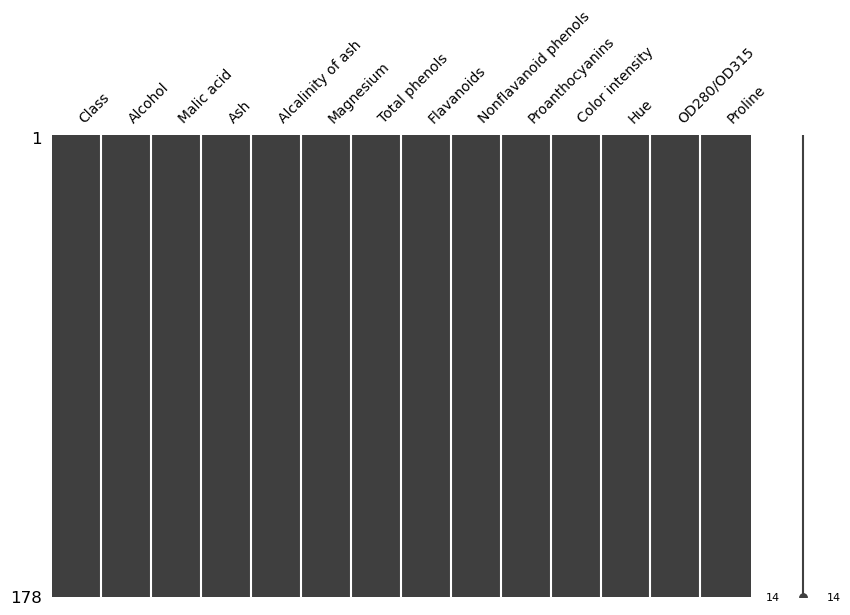

In [61]:
# Comprovem valors perduts
import missingno as msno
msno.matrix(df, figsize=(10,6),fontsize=(10))


No hi ha valors perduts

In [67]:
df.dtypes

Class                     int64
Alcohol                 float64
Malic acid              float64
Ash                     float64
Alcalinity of ash       float64
Magnesium                 int64
Total phenols           float64
Flavanoids              float64
Nonflavanoid phenols    float64
Proanthocyanins         float64
Color intensity         float64
Hue                     float64
OD280/OD315             float64
Proline                   int64
dtype: object

Les dades són floats i integers.

#### Exploració de variables

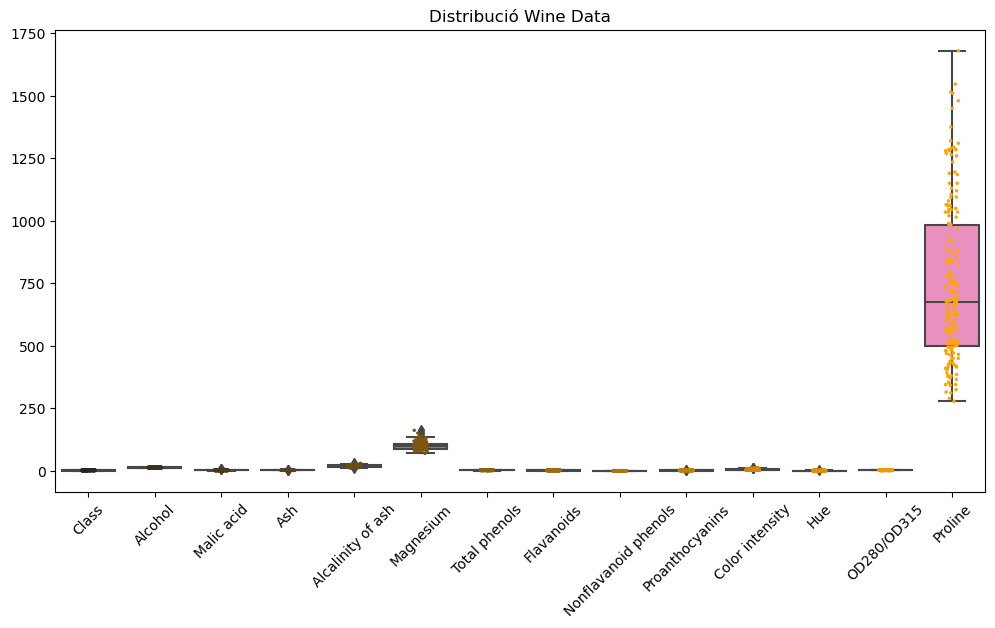

In [52]:
# Boxplot amb jitter per explorar dades

# Configuració de canvas
plt.figure(figsize=(12, 6))

# Boxplot
sns.boxplot(data=df)
sns.stripplot(data=df, color="orange", jitter=0.1, size=2.5)
plt.title('Distribució Wine Data')
plt.xticks(rotation=45)
plt.show()


Amb els valors alts de proline, no es pot visualitzar la resta de vaiables. Refarem el boxplot sense la columna "Proline" i treurem també "Magnesium" per explorar la resta de variables.

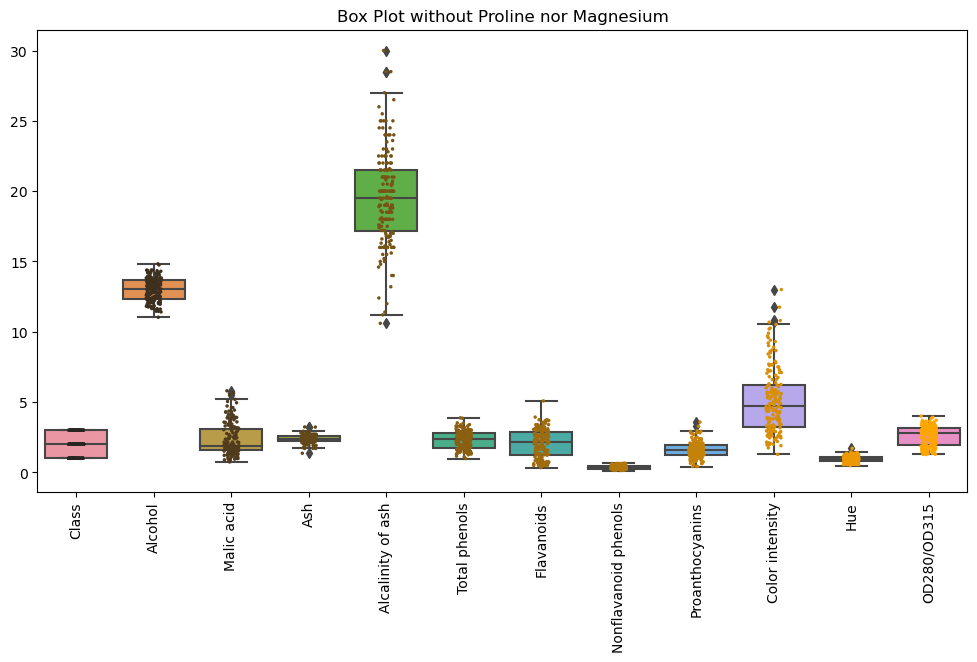

In [53]:
# Seleccionar columnes
columns_to_plot = ["Class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315"]

# Crear df
df_noproline = df[columns_to_plot]

# Boxplot amb jitter
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_noproline)
sns.stripplot(data=df_noproline, color="orange", jitter=0.1, size=2.5)

plt.xticks(rotation=90)
plt.title("Box Plot without Proline nor Magnesium")
plt.show()



Veiem que la distribució de cada variable és bastant compacta dins de la seva forquilla de valors i que hi ha en general pocs outliers.

A primera vista, la distribució d'algunes variables podria ser gaussiana. Ho analitzarem més endavant.

A continuació explorem la correlació de les varibales a través d'un mapa de calor.

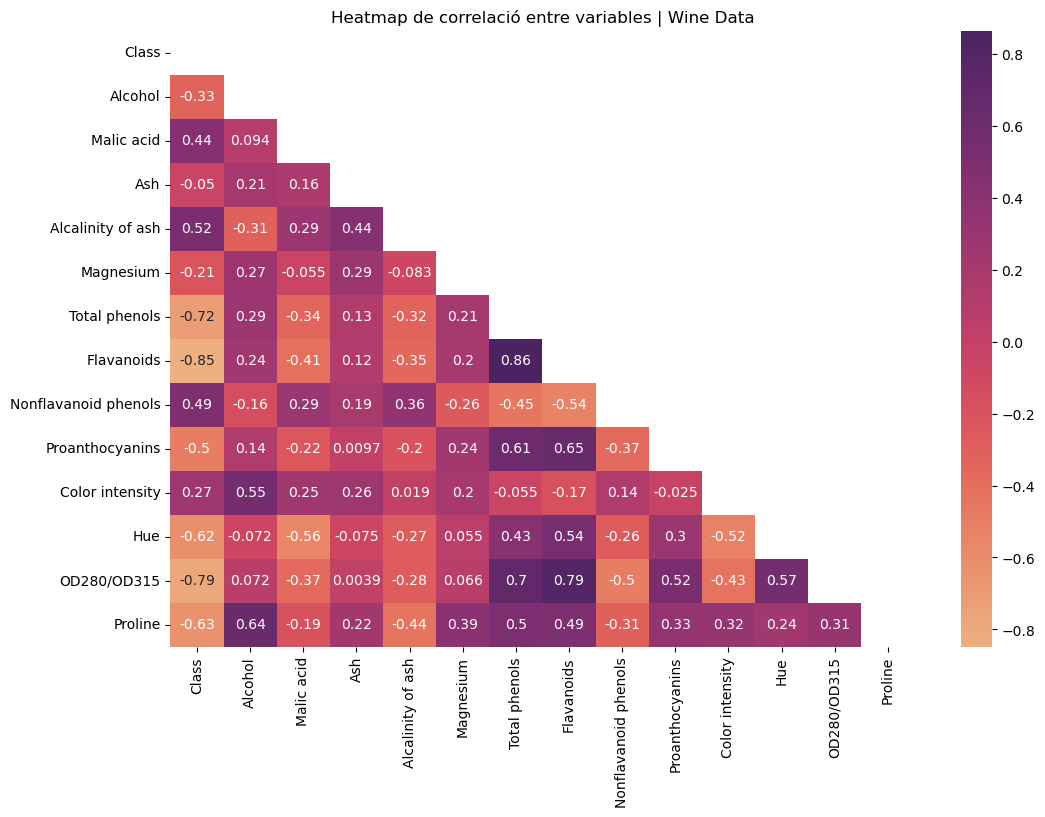

In [54]:
plt.figure(figsize=(12, 8))
matriz_corr = df.corr()

# Màscara per a ocultar la meitat superior del mapa de calor
mask = np.triu(np.ones_like(matriz_corr, dtype=bool))

# MAPA DE CALOR
cmap = sns.color_palette("flare", as_cmap=True)
sns.heatmap(matriz_corr, annot=True, cmap=cmap, mask=mask)
plt.title('Heatmap de correlació entre variables | Wine Data')
plt.show()

Les correlacions més significatives són entre:
1. Flavanoids i OD280/OD315: Al ser els flavonoides fenols, sembla lògic que afecte a la relació OD280/OD315 de vins diluïts, que al final és una mesura que pot indicar la concentració de compostos fenòlics en el vi.
2. Flavanoids i total fenols: el fet de que ambdues variables recullen fenols explica la forta correlació entre elles.

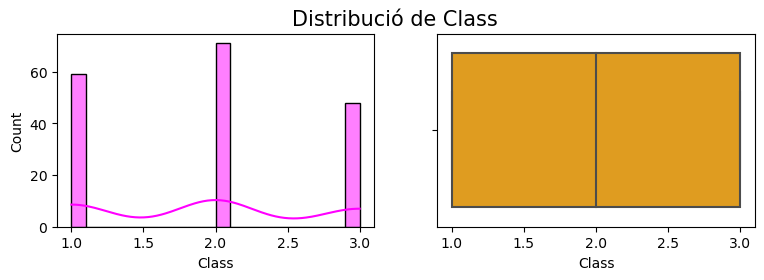

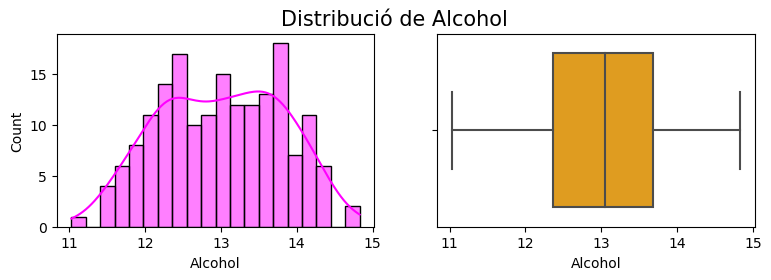

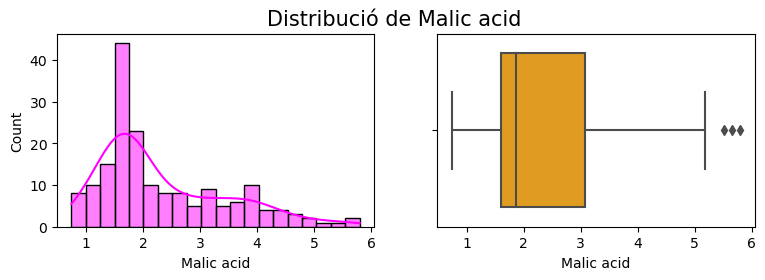

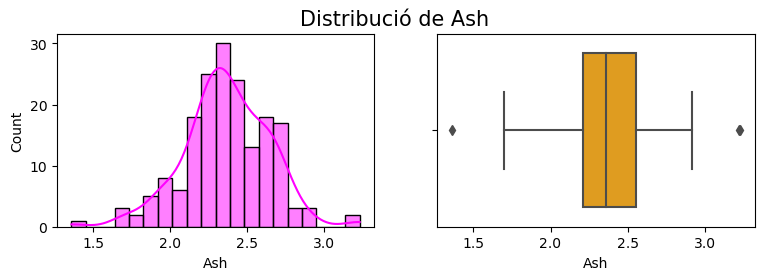

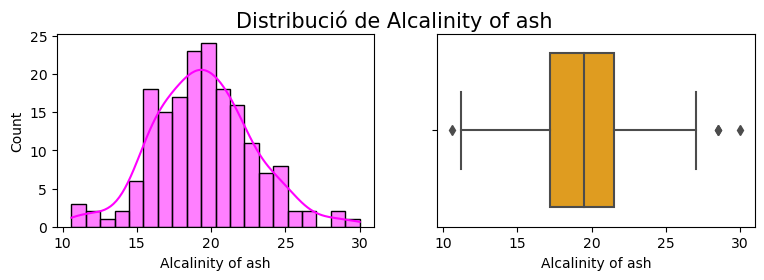

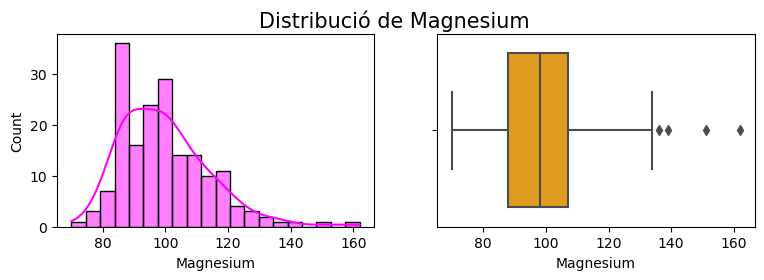

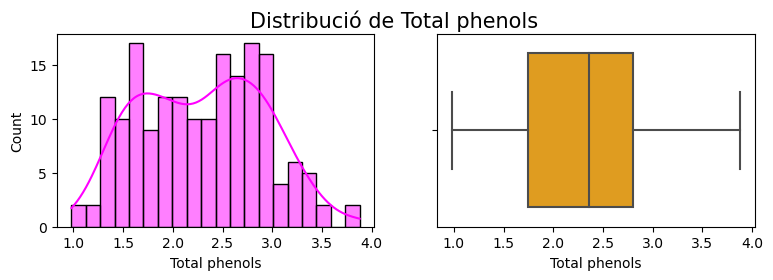

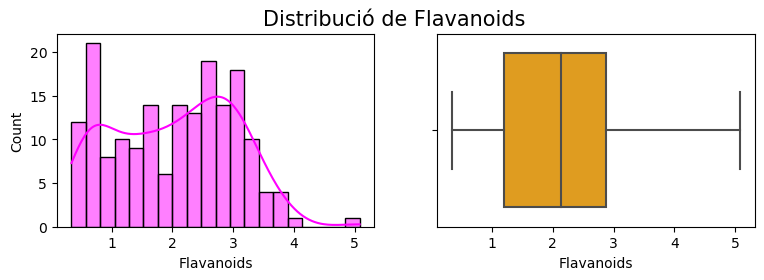

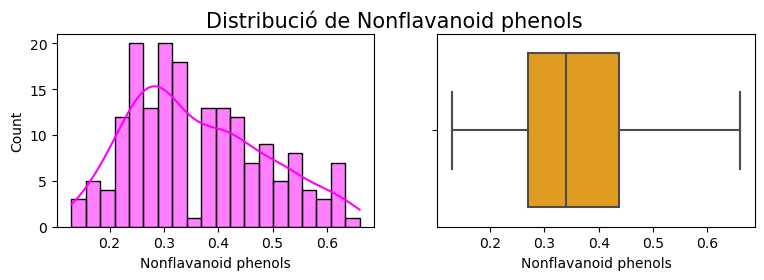

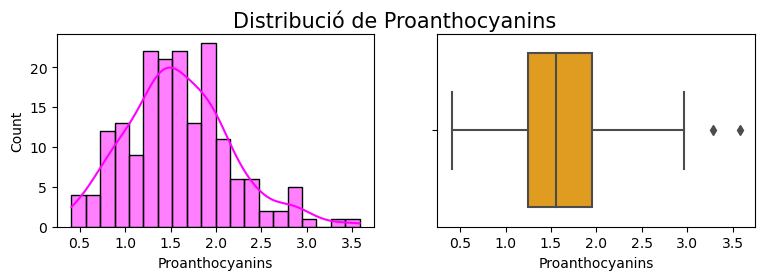

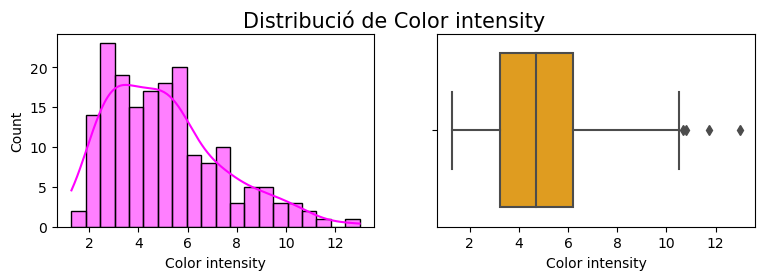

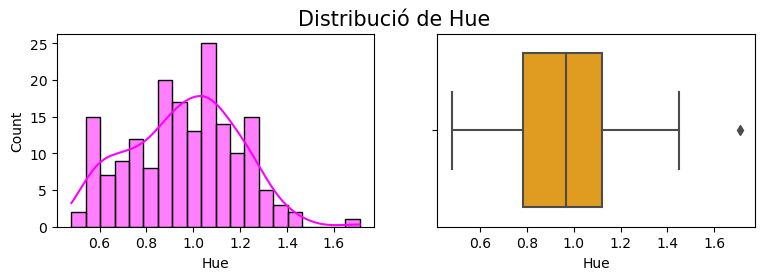

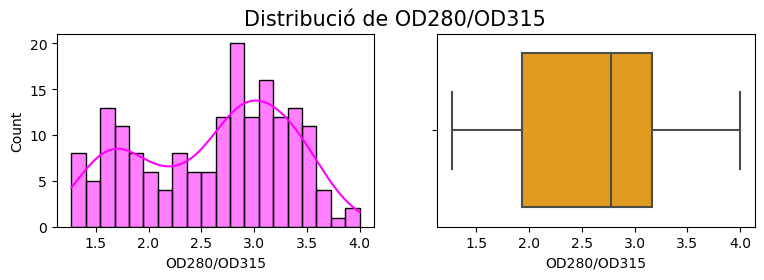

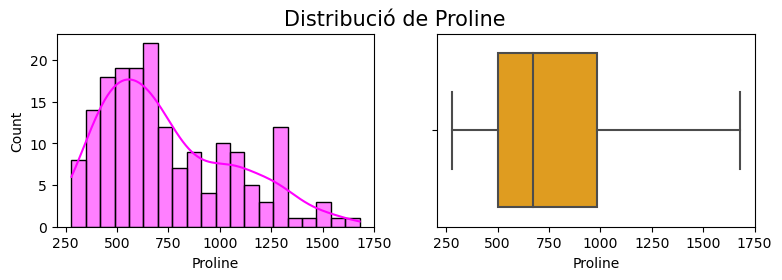

In [55]:
# Comprovar la distribució i els outliers
for column in df.columns:
    fig, axes = plt.subplots(1,2, figsize = (9,2.5))
    fig.suptitle(f'Distribució de {column}', fontsize=15) 
    sns.histplot(data=df, ax=axes[0],  x=df[column], bins=20, color='magenta', kde=True)
    sns.boxplot(ax=axes[1], x =df[column], color='orange')

### Prova de Shapiro-Wilk
Realitzem aquesta prova per saber si la mostra de dades té una distribució gaussiana.

#### Suposicions

Les observacions de cada mostra són independents i distribuïdes de manera idèntica (iid).
#### Interpretació

#### H<sub>0</sub> : la mostra té una distribució gaussiana.

#### H<sub>1</sub>: la mostra no té una distribució gaussiana.

In [65]:
# Shapiro-Wilk Normality Test
from scipy.stats import shapiro

for column in df.columns:
    stat, p = shapiro(df[column])
    
    print("*"*50)
    print(column, "| Tipus de dada:", df[column].dtypes)
    print('stat=%.3f, p=%.3f' % (stat, p))
    
    if p > 0.05:
        print('La distribució probablement ÉS gaussiana')
    else:
        print('La distribució probablement NO és gaussiana')
    print("*"*50,"\n")

**************************************************
Class | Tipus de dada: int64
stat=0.804, p=0.000
La distribució probablement NO és gaussiana
************************************************** 

**************************************************
Alcohol | Tipus de dada: float64
stat=0.982, p=0.020
La distribució probablement NO és gaussiana
************************************************** 

**************************************************
Malic acid | Tipus de dada: float64
stat=0.889, p=0.000
La distribució probablement NO és gaussiana
************************************************** 

**************************************************
Ash | Tipus de dada: float64
stat=0.984, p=0.039
La distribució probablement NO és gaussiana
************************************************** 

**************************************************
Alcalinity of ash | Tipus de dada: float64
stat=0.990, p=0.264
La distribució probablement ÉS gaussiana
**********************************************

L'única variable que presenta una distribució gaussiana és Alcalinity of ash, i per tant serà processada amb <strong> StandarScaler </strong>

Pel que fa als outliers, ja els hem visualitzat en el boxplot però també podem fer un contatge per saber amb precisióo el número exacte.

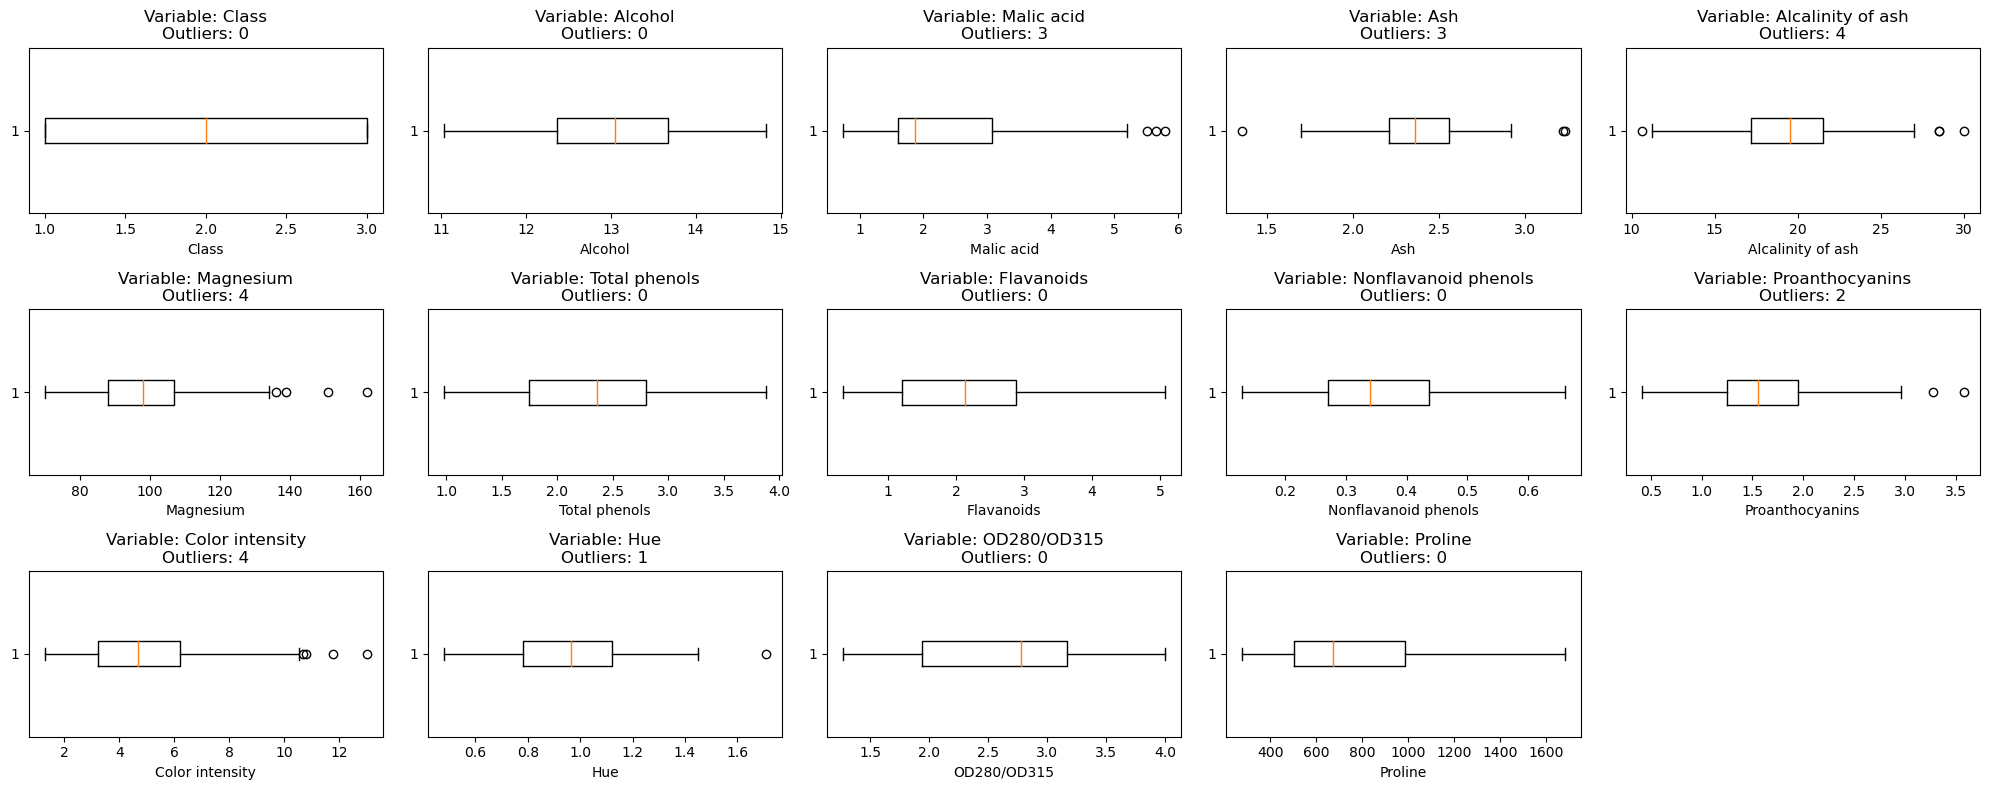

In [102]:
import math

# Llista per contatge d'outliers
num_outliers = []

# Número de columnes per fila
columnes_per_fila = 5

# Calcula el número total de files necessàries
num_files = math.ceil(len(df.columns) / columnes_per_fila)

# Mides del canvas
plt.figure(figsize=(20, 8))

# Iteració per columnes amb contatge d'outliers
for i, column in enumerate(df.columns):
    # Càlcul d'el IQR per a cada columna
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Càlcul dels límits per detectar outliers
    limit_inferior = Q1 - 1.5 * IQR
    limit_superior = Q3 + 1.5 * IQR

    # Contatge de outliers amb append
    outliers = df[(df[column] < limit_inferior) | (df[column] > limit_superior)]
    num_outliers.append(len(outliers))

    # Pintar boxplots individuals
    plt.subplot(num_files, columnes_per_fila, i + 1)
    plt.boxplot(df[column], vert=False)
    plt.title(f'Variable: {column}\nOutliers: {len(outliers)}')
    plt.xlabel(column)

# Marge entre els subplots
plt.tight_layout()

plt.show()

Les variables amb outliers són:
"Malic acid", "Magnesium", "Proanthocyanins", "Color intensity", "Hue".

Seran processades amb <strong>RobustScaler</strong>

La resta de variables seran processades amb <strong>ScalerNorm</strong>

En resum, <strong>les tècniques de normalització de dades seran les següents:</strong>
1. StandardScaler (gaussianes): "Alcalinity of ash"
2. RobustScaler (no gaussianes, outliers): "Malic acid", "Magnesium", "Proanthocyanins", "Color intensity", "Hue"
3. ScalerNorm (no gussianes, no outliers): "Alcohol", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "OD280/OD315", "Proline"
    

Per últim, explorem la variable categòrica 'Class' per saber-ne la distribució i altres característiques:

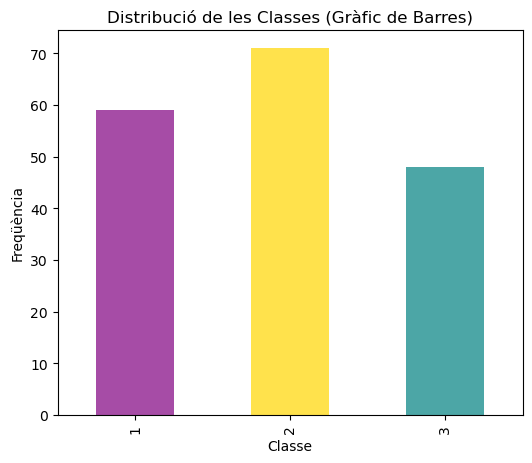

In [81]:
# Gràfic de barres
fig, ax = plt.subplots(figsize=(6, 5))
class_counts = df['Class'].value_counts().sort_index()
colors = ['purple', 'gold', 'teal']
class_counts.plot.bar(color=colors, alpha=0.7, ax=ax)
ax.set_xlabel('Classe')
ax.set_ylabel('Freqüència')
ax.set_title('Distribució de les Classes (Gràfic de Barres)')
plt.show()

Els gràfics representen la distribució de la variable "Classe", mostrant que les classes estan equilibrades sense una dominant.

El gràfic de barres mostra que la classe 2 és la més nombrosa però sense una gran diferència envers el reste de classes.

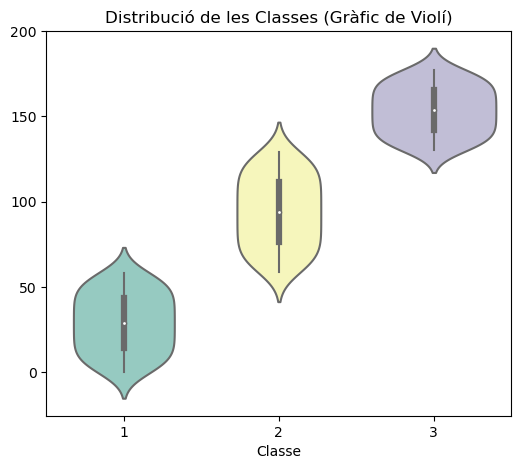

In [86]:
# Gràfic de violí
plt.figure(figsize=(6, 5))
sns.violinplot(x='Class', y=df.index, data=df, palette='Set3')
plt.xlabel('Classe')
plt.ylabel('')
plt.title('Distribució de les Classes (Gràfic de Violí)')
plt.show()


El gràfic de violí revela la variabilitat de les variables en relació amb la classe. La classe 2, a banda de ser la més nombros és també la que té major variabilitat.

## Preprocessat

A continuació, procedirem a la normalització de totes les variables (features)

In [128]:
df_pre = df.copy()

In [129]:
df_pre

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [134]:
# Escalar la columna 'Alcalinity of ash' correspondiente
from sklearn.preprocessing import StandardScaler

# Creació d'un objevte StandardScaler and fit it to the column
stand = StandardScaler()
df_pre[['Alcalinity of ash']] = stand.fit_transform(df_pre[['Alcalinity of ash']])

# Veure resultats
df_pre

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1,0.842105,-0.104730,0.201439,-1.169593,1.526316,0.627586,0.573840,0.283019,1.050000,0.318792,0.222222,0.970696,0.561341
1,1,0.571053,-0.057432,-0.633094,-2.490847,0.105263,0.575862,0.510549,0.245283,-0.392857,-0.104027,0.251852,0.780220,0.550642
2,1,0.560526,0.334459,0.892086,-0.268738,0.157895,0.627586,0.611814,0.320755,1.792857,0.332215,0.192593,0.695971,0.646933
3,1,0.878947,0.057432,0.402878,-0.809251,0.789474,0.989655,0.664557,0.207547,0.892857,1.043624,-0.311111,0.798535,0.857347
4,1,0.581579,0.489865,1.467626,0.451946,1.052632,0.627586,0.495781,0.490566,0.378571,-0.124161,0.222222,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,0.705263,2.557432,0.258993,0.301803,-0.157895,0.241379,0.056962,0.735849,-0.707143,1.010067,-0.962963,0.172161,0.329529
174,3,0.623684,1.381757,0.345324,1.052516,0.210526,0.282759,0.086498,0.566038,-0.207143,0.875839,-0.785185,0.106227,0.336662
175,3,0.589474,1.631757,-0.287770,0.151661,1.157895,0.210345,0.073840,0.566038,-0.292857,1.848993,-1.111111,0.106227,0.397290
176,3,0.563158,0.489865,0.028777,0.151661,1.157895,0.231034,0.071730,0.754717,-0.135714,1.546980,-1.081481,0.128205,0.400856


In [135]:
# RobustScaler
robus = RobustScaler().fit(df_pre[['Malic acid', 'Ash', 'Magnesium', 'Proanthocyanins', 'Color intensity', 'Hue']])
df_pre[['Malic acid', 'Ash', 'Magnesium', 'Proanthocyanins', 'Color intensity', 'Hue']] = robus.transform(df_pre[['Malic acid', 'Ash', 'Magnesium', 'Proanthocyanins', 'Color intensity', 'Hue']])

# Veure resultats

df_pre


,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1,0.842105,-0.104730,0.201439,-1.169593,1.526316,0.627586,0.573840,0.283019,1.050000,0.318792,0.222222,0.970696,0.561341
1,1,0.571053,-0.057432,-0.633094,-2.490847,0.105263,0.575862,0.510549,0.245283,-0.392857,-0.104027,0.251852,0.780220,0.550642
2,1,0.560526,0.334459,0.892086,-0.268738,0.157895,0.627586,0.611814,0.320755,1.792857,0.332215,0.192593,0.695971,0.646933
3,1,0.878947,0.057432,0.402878,-0.809251,0.789474,0.989655,0.664557,0.207547,0.892857,1.043624,-0.311111,0.798535,0.857347
4,1,0.581579,0.489865,1.467626,0.451946,1.052632,0.627586,0.495781,0.490566,0.378571,-0.124161,0.222222,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,0.705263,2.557432,0.258993,0.301803,-0.157895,0.241379,0.056962,0.735849,-0.707143,1.010067,-0.962963,0.172161,0.329529
174,3,0.623684,1.381757,0.345324,1.052516,0.210526,0.282759,0.086498,0.566038,-0.207143,0.875839,-0.785185,0.106227,0.336662
175,3,0.589474,1.631757,-0.287770,0.151661,1.157895,0.210345,0.073840,0.566038,-0.292857,1.848993,-1.111111,0.106227,0.397290
176,3,0.563158,0.489865,0.028777,0.151661,1.157895,0.231034,0.071730,0.754717,-0.135714,1.546980,-1.081481,0.128205,0.400856


In [136]:
# MinMaxScaler
minmax = MinMaxScaler().fit(df_pre[['Alcohol', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'OD280/OD315', 'Proline']])
df_pre[['Alcohol', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'OD280/OD315', 'Proline']] = minmax.transform(df_pre[['Alcohol', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'OD280/OD315', 'Proline']])

# Veure resultats
df_pre


,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1,0.842105,-0.104730,0.201439,-1.169593,1.526316,0.627586,0.573840,0.283019,1.050000,0.318792,0.222222,0.970696,0.561341
1,1,0.571053,-0.057432,-0.633094,-2.490847,0.105263,0.575862,0.510549,0.245283,-0.392857,-0.104027,0.251852,0.780220,0.550642
2,1,0.560526,0.334459,0.892086,-0.268738,0.157895,0.627586,0.611814,0.320755,1.792857,0.332215,0.192593,0.695971,0.646933
3,1,0.878947,0.057432,0.402878,-0.809251,0.789474,0.989655,0.664557,0.207547,0.892857,1.043624,-0.311111,0.798535,0.857347
4,1,0.581579,0.489865,1.467626,0.451946,1.052632,0.627586,0.495781,0.490566,0.378571,-0.124161,0.222222,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,0.705263,2.557432,0.258993,0.301803,-0.157895,0.241379,0.056962,0.735849,-0.707143,1.010067,-0.962963,0.172161,0.329529
174,3,0.623684,1.381757,0.345324,1.052516,0.210526,0.282759,0.086498,0.566038,-0.207143,0.875839,-0.785185,0.106227,0.336662
175,3,0.589474,1.631757,-0.287770,0.151661,1.157895,0.210345,0.073840,0.566038,-0.292857,1.848993,-1.111111,0.106227,0.397290
176,3,0.563158,0.489865,0.028777,0.151661,1.157895,0.231034,0.071730,0.754717,-0.135714,1.546980,-1.081481,0.128205,0.400856


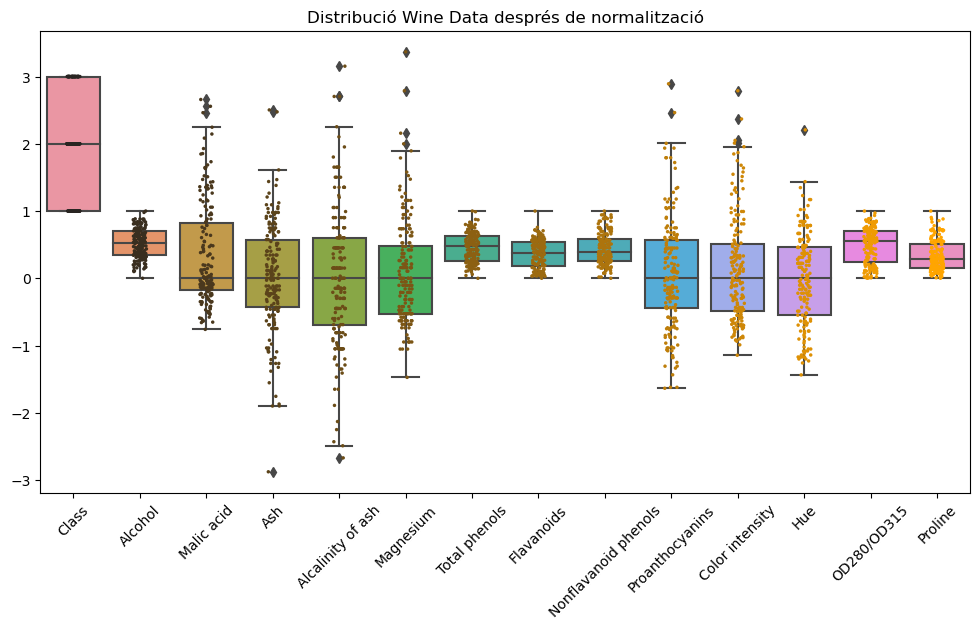

In [140]:
# Boxplot amb jitter per explorar dades després de la normalització

# Configuració de canvas
plt.figure(figsize=(12, 6))

# Boxplot
sns.boxplot(data=df_pre)
sns.stripplot(data=df_pre, color="orange", jitter=0.1, size=2.5)
plt.title('Distribució Wine Data  després de normalització')
plt.xticks(rotation=45)
plt.show()

Podem veure com la majoria de dades de totes les variables normalitzades ('Class' al ser categòrica no entra) bascul·len entre 1 i -1 amb certa dispersió i outliers entre 3 i -3.

### Train & Test Split
Ara procedirem a fer la divisió en test/train amb la variable Class com a target i amb una proporció 80-20%

In [141]:
from sklearn.model_selection import train_test_split

# Assignació variables target i features
X = df_pre.drop(['Class'], axis=1)
y = df_pre['Class']

# Split 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=3)

# Imprimir dimensió dels subdatasets
print(f"Dimensió X_train: {X_train.shape}")
print(f"Dimensió X_test: {X_test.shape}")
print(f"Dimensió y_train: {X_test.shape}") 
print(f"Dimensió y_test:, {y_test.shape}")

Dimensió X_train: (142, 13)
Dimensió X_test: (36, 13)
Dimensió y_train: (36, 13)
Dimensió y_test:, (36,)


# Exercici 1
Crea almenys dos models de classificació diferents per intentar predir el millor les classes de l'arxiu adjunt.


### KNN - K-Nearest-Neighbors
El "K-Nearest-Neighbors" (k-NN) és un model d'aprenentatge automàtic supervisat. L'aprenentatge supervisat és quan un model aprèn de dades que ja estan etiquetades. Un model d'aprenentatge supervisat rep un conjunt d'objectes d'entrada i valors de sortida. Després, el model s'entrena amb aquestes dades per aprendre com fer correspondre les entrades amb la sortida desitjada, de manera que pugui aprendre a fer prediccions sobre dades no vistes.

Font: https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a

In [150]:
from sklearn.neighbors import KNeighborsClassifier

# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [151]:
#show first 5 model predictions on the test data
knn.predict(X_test)[0:5]

array([1, 1, 1, 2, 3])

In [152]:
#check accuracy of our model on the test data
knn.score(X_test, y_test)


0.8888888888888888

El model KNN encerta en el 88.8% de les ocasions.

### Decision Tree Classifier
Un arbre de decisió és una estructura d'arbre similar a un diagrama de flux on un node intern representa una característica (o atribut), la branca representa una regla de decisió i cada fulla representa el resultat.

El node més alt en un arbre de decisió es coneix com el node arrel. Aprèn a fer particions basades en el valor de l'atribut. Fa particions a l'arbre de manera recursiva, anomenada partició recursiva. Aquesta estructura similar a un diagrama de flux ajuda en la presa de decisions. Es visualitza com un diagrama de flux que imita fàcilment el pensament a nivell humà. Per això, els arbres de decisió són fàcils d'entendre i interpretar.

Font: https://www.datacamp.com/tutorial/decision-tree-classification-python

In [153]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
dt = DecisionTreeClassifier(random_state=3)

# Train Decision Tree Classifer
dt = dt.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_dt = dt.predict(X_test)
y_pred_dt[0:5]

array([1, 1, 1, 2, 3])

In [154]:
dt.score(X_test, y_test)

0.8333333333333334

El model Decision Tree Classifier encerta en el 83.3% de les ocasions.

### Logistic Regression

In [177]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=3)

# Ajust
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_pred_dt[0:5]

array([1, 1, 1, 2, 3])

In [178]:
lr.score(X_test, y_test)

0.9444444444444444

Amb la regressió logística, encertarem el 94.4% de les vegades




# Exercici 2
Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confusió i d’altres mètriques més avançades.



# Exercici 3
Entrena’ls usant els diferents paràmetres que admeten per tal de millorar-ne la predicció.



# Exercici 4
Compara el seu rendiment fent servir l’aproximació traint/test o cross-validation.



# Exercici 5
Aplica algun procés d'enginyeria per millorar els resultats (normalització, estandardització, mostreig...)
